# Finance Data Project 

**This notebook was provided as part of the course 'Python for Data Science and Machine Learning Bootcamp' in Udemy. The code shown below was written by me as part of the solutions to the exercises and projects of the course.**

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [31]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [39]:
start = datetime.datetime(2005,1,1)
end = datetime.datetime(2016,1,1)

In [40]:
BAC = data.DataReader('BAC','yahoo', start, end)
C = data.DataReader('C','yahoo', start, end)
GS = data.DataReader('GS','yahoo', start, end)
JPM = data.DataReader('JPM','yahoo', start, end)
MS = data.DataReader('MS','yahoo', start, end)
WFC = data.DataReader('WFC','yahoo', start, end)

In [41]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,46.950001,46.180000,46.660000,46.459999,10238100.0,33.177040
2005-01-04,46.730000,45.740002,46.410000,45.820000,10264100.0,32.720013
2005-01-05,45.939999,45.250000,45.639999,45.290001,14796100.0,32.341545
2005-01-06,45.630001,44.990002,45.419998,45.220001,14602200.0,32.291576
2005-01-07,45.360001,44.720001,45.299999,44.730000,10547200.0,31.941660


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [42]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [43]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],
                        axis=1,keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2005-01-03  46.950001  46.180000  46.660000  46.459999  10238100.0  33.177040   
2005-01-04  46.730000  45.740002  46.410000  45.820000  10264100.0  32.720013   
2005-01-05  45.939999  45.250000  45.639999  45.290001  14796100.0  32.341545   
2005-01-06  45.630001  44.990002  45.419998  45.220001  14602200.0  32.291576   
2005-01-07  45.360001  44.720001  45.299999  44.730000  10547200.0  31.941660   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2005-01-03  490.000000  482.000000  490.000000  482.700012  ...  55.970001   
2005-01-04  487.700012  477.000000  482.799988  478.600006  ...  56.000000   
2005-01-05  487.799988  480.200012  480.500000  484.600006  ...  55.049999   
2005-01-06  492.399994  487.399994  488.000000  489.299988  ...  55.950001   
2005-01-07  491.100006  486.000000  491.000000  486.500000  ...  56.450001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2005-01-03  55.900002  5105800.0  35.172306  31.165001  30.875000  31.115000   
2005-01-04  55.299999  6100300.0  34.794777  31.250000  30.885000  30.975000   
2005-01-05  54.980000  5072100.0  34.593433  31.375000  30.975000  31.040001   
2005-01-06  56.279999  5991400.0  35.411400  31.150000  30.900000  31.049999   
2005-01-07  56.060001  4269900.0  35.272980  31.280001  31.030001  31.170000   

                                             
                Close     Volume  Adj Close  
Date                                         
2005-01-03  30.955000  8168200.0  18.535013  
2005-01-04  30.980000  9241400.0  18.549980  
2005-01-05  31.014999  7694600.0  18.570950  
2005-01-06  31.125000  8887600.0  18.636808  
2005-01-07  31.084999  6573200.0  18.612856  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [44]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [45]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2005-01-03   46.950001  46.180000  46.660000  46.459999  10238100.0   
2005-01-04   46.730000  45.740002  46.410000  45.820000  10264100.0   
2005-01-05   45.939999  45.250000  45.639999  45.290001  14796100.0   
2005-01-06   45.630001  44.990002  45.419998  45.220001  14602200.0   
2005-01-07   45.360001  44.720001  45.299999  44.730000  10547200.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2005-01-03   33.177040  490.000000  482.000000  490.000000  482.700012  ...   
2005-01-04   32.720013  487.700012  477.000000  482.799988  478.600006  ...   
2005-01-05   32.341545  487.799988  480.200012  480.500000  484.600006  ...   
2005-01-06   32.291576  492.399994  487.399994  488.000000  489.299988  ...   
2005-01-07   31.941660  491.100006  486.000000  491.000000  486.500000  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2005-01-03   55.970001  55.900002  5105800.0  35.172306  31.165001  30.875000   
2005-01-04   56.000000  55.299999  6100300.0  34.794777  31.250000  30.885000   
2005-01-05   55.049999  54.980000  5072100.0  34.593433  31.375000  30.975000   
2005-01-06   55.950001  56.279999  5991400.0  35.411400  31.150000  30.900000   
2005-01-07   56.450001  56.060001  4269900.0  35.272980  31.280001  31.030001   

Bank Ticker                                              
Stock Info        Open      Close     Volume  Adj Close  
Date                                                     
2005-01-03   31.115000  30.955000  8168200.0  18.535013  
2005-01-04   30.975000  30.980000  9241400.0  18.549980  
2005-01-05   31.040001  31.014999  7694600.0  18.570950  
2005-01-06   31.049999  31.125000  8887600.0  18.636808  
2005-01-07   31.170000  31.084999  6573200.0  18.612856  

[5 rows x 36 columns]

# Exploratory Data Analysis

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [46]:
bank_stocks.xs(key='Close',axis=1, 
               level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [47]:
#other way to do it
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [48]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [49]:
for tick in tickers:
    returns[tick+' Return']=bank_stocks[tick]['Close'].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,-0.013775,-0.008494,-0.006479,-0.018902,-0.010733,0.000808
2005-01-05,-0.011567,0.012537,-0.004507,0.002083,-0.005787,0.001130
2005-01-06,-0.001546,0.009699,0.013776,0.005716,0.023645,0.003547
2005-01-07,-0.010836,-0.005722,-0.004276,-0.008008,-0.003909,-0.001285


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

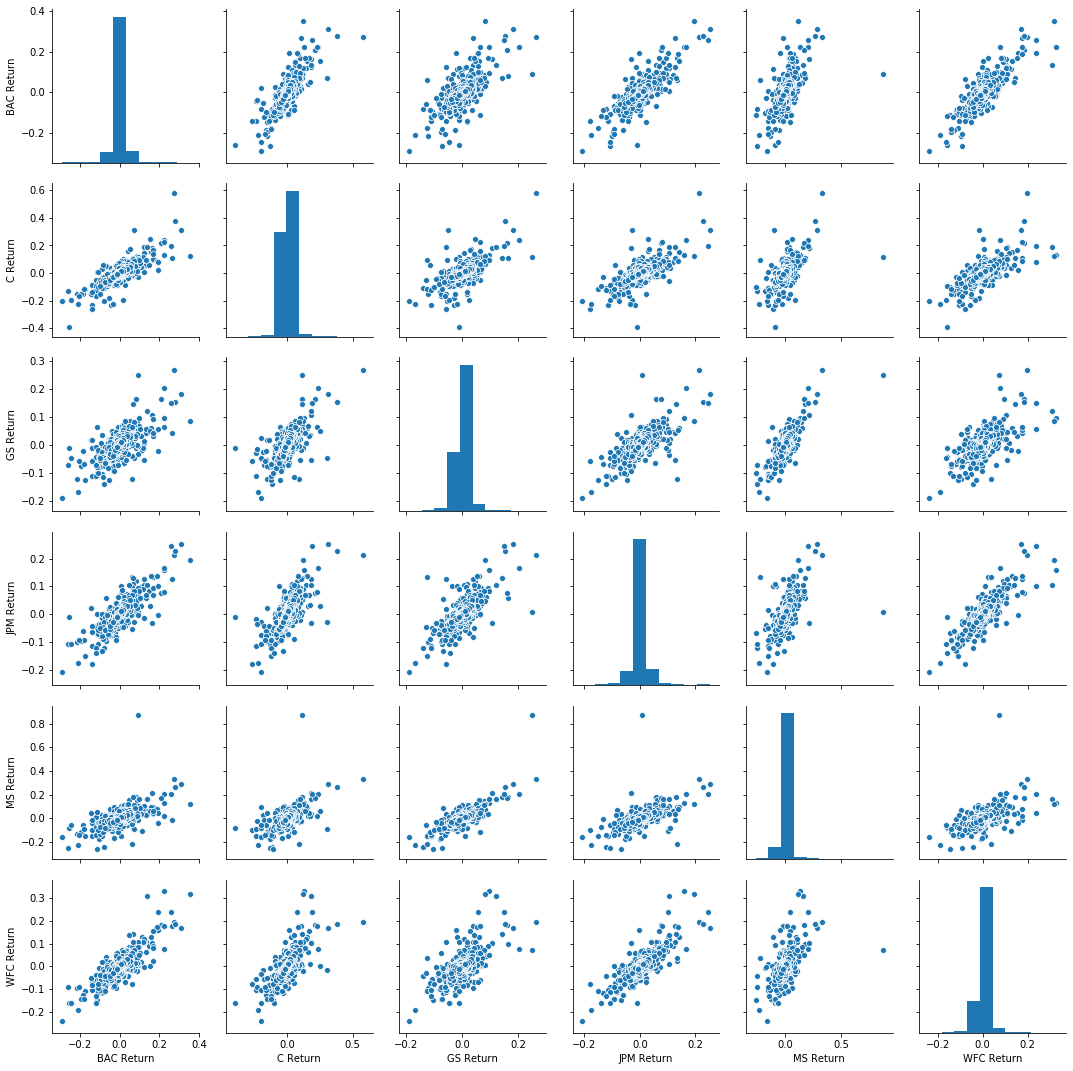

In [50]:
sns.pairplot(returns[1:])

* Citigroup had a stock crash durin November 2008 as part of the GFC due to the bank becoming insolvent. 

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [51]:
for tick in tickers:
    print(tick, returns[tick+' Return'].argmin())

BAC 2009-01-20 00:00:00
C 2009-02-27 00:00:00
GS 2009-01-20 00:00:00
JPM 2009-01-20 00:00:00
MS 2008-10-09 00:00:00
WFC 2009-01-20 00:00:00


/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [52]:
returns.idxmax() #other way to get minimum argument

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [53]:
#Whole period
returns.std()

BAC Return    0.035023
C Return      0.036943
GS Return     0.024459
JPM Return    0.026508
MS Return     0.036286
WFC Return    0.028923
dtype: float64

In [62]:
#2015
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

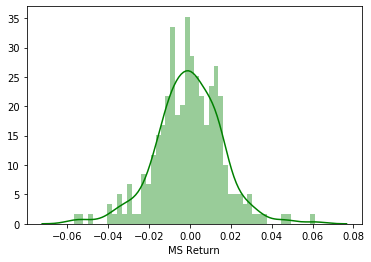

In [66]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], 
             color='green', bins=50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

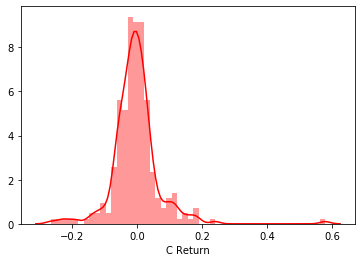

In [67]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], 
             color='red', bins=50)

- The SD in 2008 shows a wider distribution. 

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

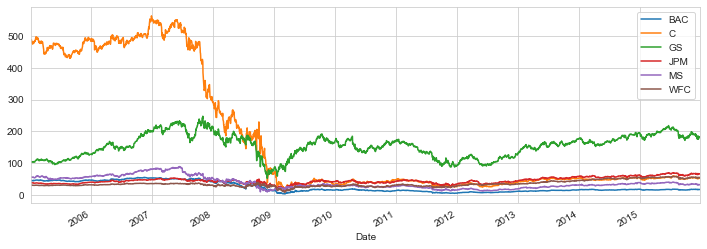

In [70]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,
                                   figsize=(12,4))
plt.legend()

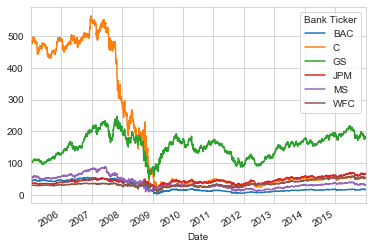

In [73]:
bank_stocks.xs(key='Close',
               axis=1, level = 'Stock Info').plot()

In [74]:
bank_stocks.xs(key='Close',
               axis=1, level = 'Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

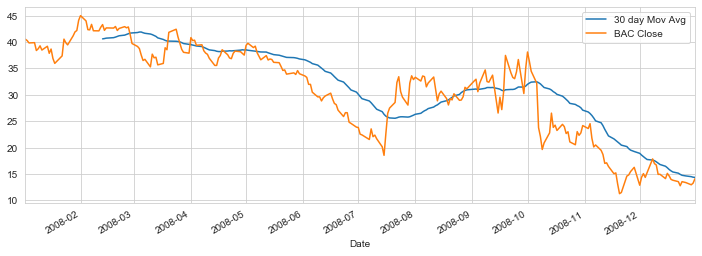

In [80]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 day Mov Avg')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

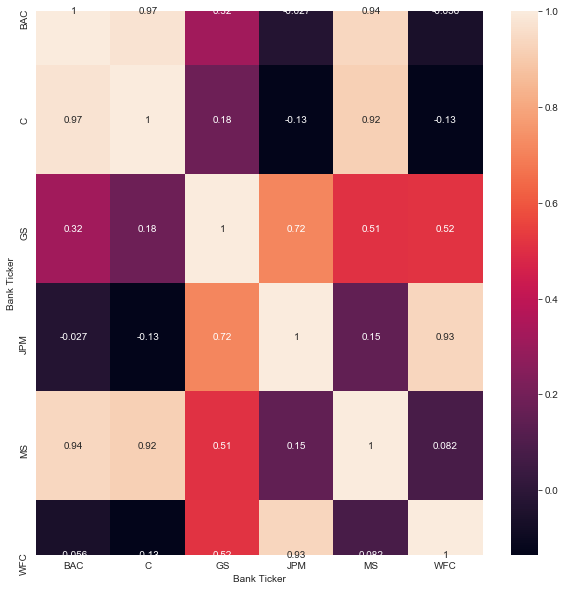

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(bank_stocks.xs(key='Close',axis=1, level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

<Figure size 720x720 with 0 Axes>

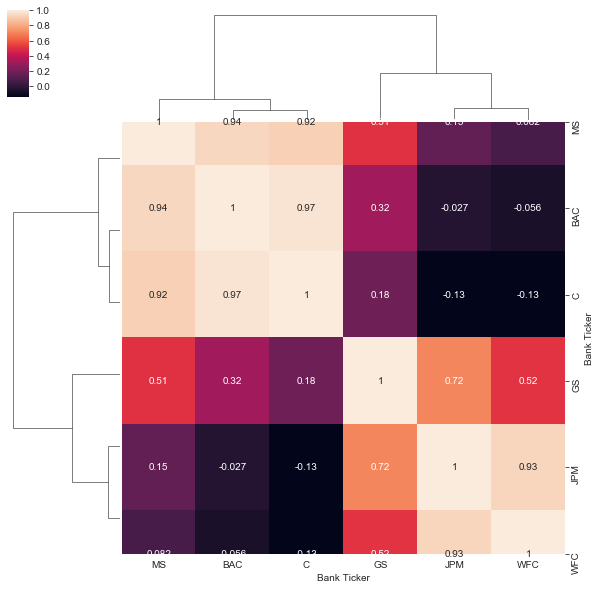

In [84]:
plt.figure(figsize=(10,10))
sns.clustermap(bank_stocks.xs(key='Close',axis=1, level='Stock Info').corr(),annot=True)

- Citi, MS and BAC are grouped together in the same cluster based on the correlation of their prices.

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [89]:
bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-12-31']
bac15.iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [92]:
MS['Close'].loc['2015-01-01':'2016-12-31'].ta_plot(study='sma',periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [94]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.